In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_path = 'gdrive/My Drive/fruits-360/'

In [ ]:
!ls root_path

ls: cannot access 'root_path': No such file or directory


In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob

In [ ]:
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/fruits-360/fruits-360/Training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/0_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/101_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/100_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/103_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/102_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/104_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/10_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/1_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/13_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/116_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/110_100.jpg
/content/gdrive/MyDrive/fruits-360/fruits-360/Training/Apple Golden 2/118_100.jpg
/content/gdrive/MyDriv

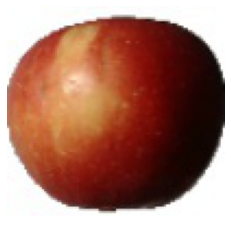

(100, 100, 3)


In [ ]:
train_path = '/content/gdrive/MyDrive/fruits-360/fruits-360/Training/'
test_path = '/content/gdrive/MyDrive/fruits-360/fruits-360/Test/'
#Displaying the image
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

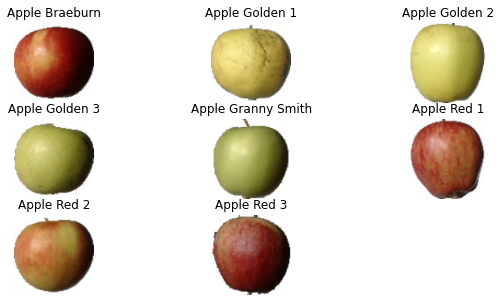

In [ ]:
images = ['Apple Braeburn','Apple Golden 1','Apple Golden 2','Apple Golden 3','Apple Granny Smith','Apple Red 1','Apple Red 2','Apple Red 3']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [ ]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Apple Golden 2', 492),
 ('Apple Red 1', 492),
 ('Apple Granny Smith', 492),
 ('Apple Red Yellow', 492),
 ('Apple Golden 1', 492),
 ('Apple Red 2', 492),
 ('Apple Braeburn', 492),
 ('Apple Red Delicious', 490),
 ('Apple Golden 3', 481),
 ('Apple Red 3', 429)]

In [ ]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

10


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [ ]:
epochs = 100
batch_size = 64

In [ ]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 4844 images belonging to 10 classes.
Found 1619 images belonging to 10 classes.


In [20]:
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
25/25 [==============================] - 1358s 55s/step - loss: 2.0730 - accuracy: 0.2456 - val_loss: 1.4830 - val_accuracy: 0.2969
Epoch 2/100
25/25 [==============================] - 809s 33s/step - loss: 1.2980 - accuracy: 0.4969 - val_loss: 1.3359 - val_accuracy: 0.5573
Epoch 3/100
25/25 [==============================] - 493s 20s/step - loss: 1.0087 - accuracy: 0.6206 - val_loss: 0.7875 - val_accuracy: 0.6862
Epoch 4/100
25/25 [==============================] - 319s 13s/step - loss: 0.9248 - accuracy: 0.6894 - val_loss: 0.6287 - val_accuracy: 0.7096
Epoch 5/100
25/25 [==============================] - 190s 7s/step - loss: 0.6056 - accuracy: 0.7671 - val_loss: 0.3833 - val_accuracy: 0.8646
Epoch 6/100
25/25 [==============================] - 114s 5s/step - loss: 0.5137 - accuracy: 0.8081 - val_loss: 0.3398 - val_accuracy: 0.8411
Epoch 7/100
25/25 [==============================] - 94s 4s/step - loss: 0.4787 - accuracy: 0.8375 - val_loss: 0.2647 - val_accuracy: 0.9297
Ep

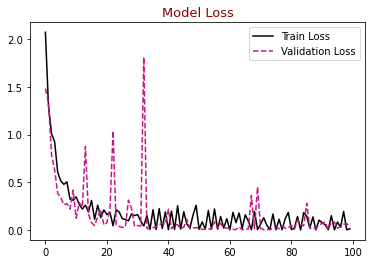

In [21]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

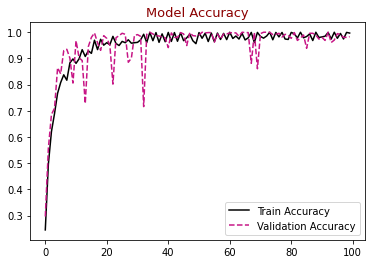

In [22]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [24]:

def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

In [27]:
img = load('/content/gdrive/MyDrive/fruits-360/fruits-360/Test/Apple Red 1/321_100.jpg')

In [28]:
prediction = (np.argmax(model.predict(img), axis=-1))
print(prediction)

[5]


In [29]:
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9}
